In [50]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from missingno import matrix
import missingno as msno

In [65]:
import seaborn as sns

# Cargar el dataset Titanic
titanic_data = sns.load_dataset('titanic')

# Ver las primeras filas del DataFrame
print(titanic_data.head())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [66]:
# Información general del dataset (tipos de datos, nulos, etc.)
print(titanic_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [67]:
# Resumen estadístico de las columnas numéricas
print(titanic_data.describe())


         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [68]:
# Porcentaje de valores nulos por columna
missing_data = titanic_data.isnull().mean() * 100
print(missing_data)


survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64


In [69]:
# Distribución de las columnas categóricas
print(titanic_data['sex'].value_counts())
print(titanic_data['embarked'].value_counts())


sex
male      577
female    314
Name: count, dtype: int64
embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [76]:
# Eliminar las columnas 'survived', 'embarked' y 'deck'
titanic_data = titanic_data.drop(columns=['survived', 'embarked', 'deck'])

# Verificar que las columnas fueron eliminadas
print(titanic_data.columns)


Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'class', 'who',
       'adult_male', 'embark_town', 'alive', 'alone'],
      dtype='object')


In [77]:
# Convertir 'sex' a tipo categórico
titanic_data['sex'] = titanic_data['sex'].astype('category')

# Convertir 'pclass' a tipo entero (si es necesario)
titanic_data['pclass'] = titanic_data['pclass'].astype(int)


In [78]:
# Revisar los tipos de datos de todas las columnas
print(titanic_data.dtypes)


pclass            int64
sex            category
age             float64
sibsp             int64
parch             int64
fare            float64
class          category
who              object
adult_male         bool
embark_town      object
alive            object
alone              bool
dtype: object


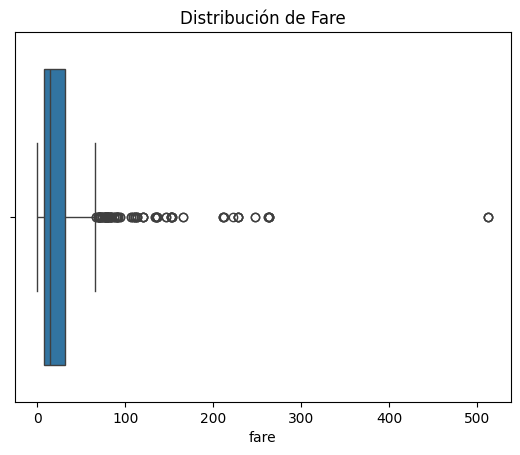

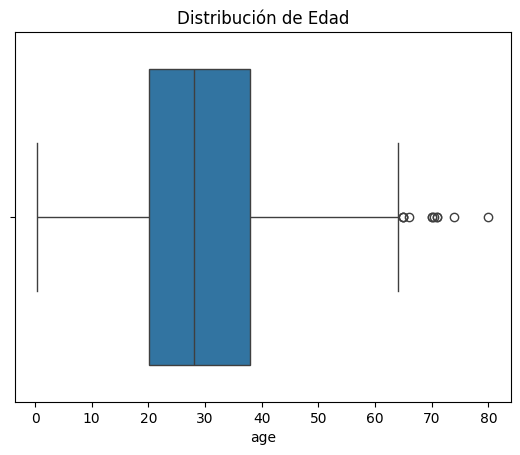

In [79]:
# Boxplot para ver los outliers en la columna 'fare'
sns.boxplot(x=titanic_data['fare'])
plt.title('Distribución de Fare')
plt.show()

# Boxplot para ver los outliers en la columna 'age'
sns.boxplot(x=titanic_data['age'])
plt.title('Distribución de Edad')
plt.show()


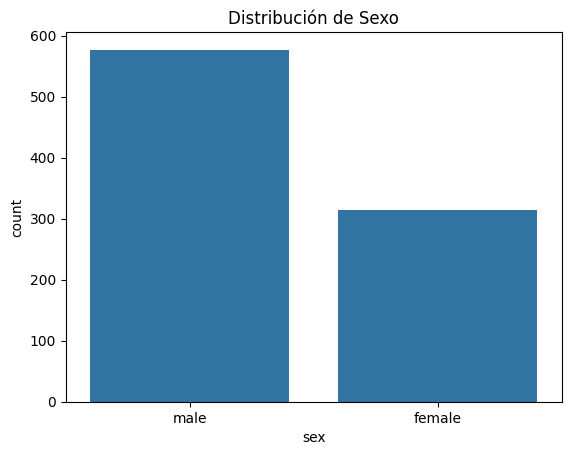

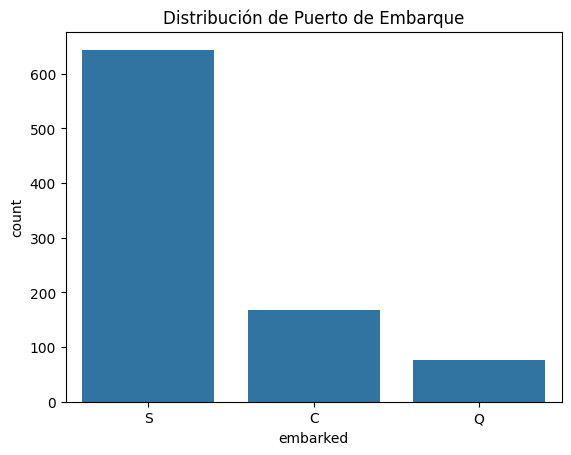

In [70]:
import matplotlib.pyplot as plt

# Gráfico de barras para 'sex' (por ejemplo)
sns.countplot(x='sex', data=titanic_data)
plt.title('Distribución de Sexo')
plt.show()

# Gráfico de barras para 'embarked'
sns.countplot(x='embarked', data=titanic_data)
plt.title('Distribución de Puerto de Embarque')
plt.show()


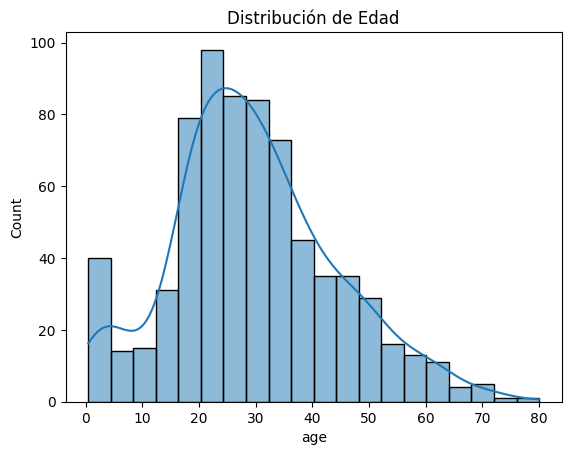

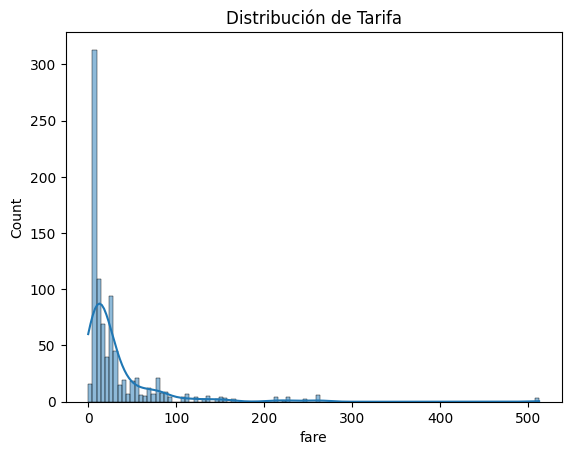

In [71]:
# Histograma para la edad (age)
sns.histplot(titanic_data['age'].dropna(), kde=True)
plt.title('Distribución de Edad')
plt.show()

# Histograma para la tarifa (fare)
sns.histplot(titanic_data['fare'], kde=True)
plt.title('Distribución de Tarifa')
plt.show()


sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


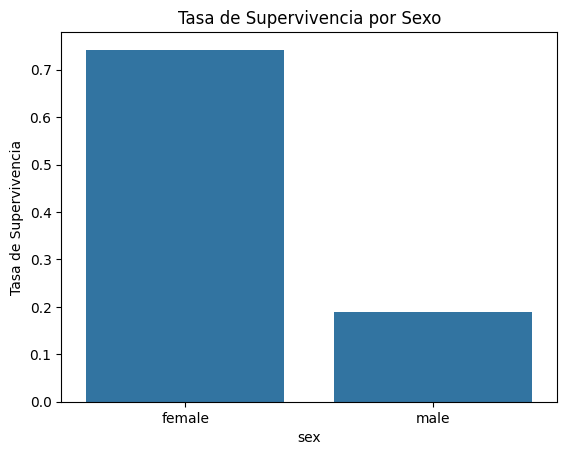

In [73]:
# Tasa de supervivencia por sexo
survival_by_sex = titanic_data.groupby('sex')['survived'].mean()
print(survival_by_sex)

# Gráfico de barras para tasa de supervivencia por sexo
sns.barplot(x=survival_by_sex.index, y=survival_by_sex.values)
plt.title('Tasa de Supervivencia por Sexo')
plt.ylabel('Tasa de Supervivencia')
plt.show()


pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64


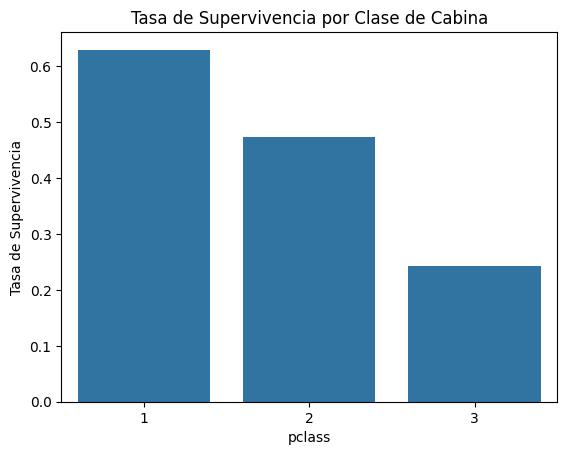

In [74]:
# Tasa de supervivencia por clase de cabina
survival_by_pclass = titanic_data.groupby('pclass')['survived'].mean()
print(survival_by_pclass)

# Gráfico de barras para tasa de supervivencia por clase
sns.barplot(x=survival_by_pclass.index, y=survival_by_pclass.values)
plt.title('Tasa de Supervivencia por Clase de Cabina')
plt.ylabel('Tasa de Supervivencia')
plt.show()


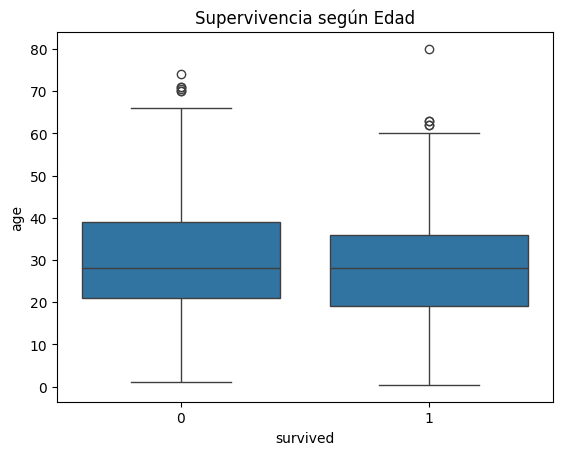

In [75]:
# Supervivencia según la edad (edad y supervivencia)
sns.boxplot(x='survived', y='age', data=titanic_data)
plt.title('Supervivencia según Edad')
plt.show()
